# 搭建神经网络 使用olivttiface数据集训练

In [4]:
from sklearn.datasets import fetch_olivetti_faces

In [5]:
olivetti_faces = fetch_olivetti_faces(data_home="./face_data", shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


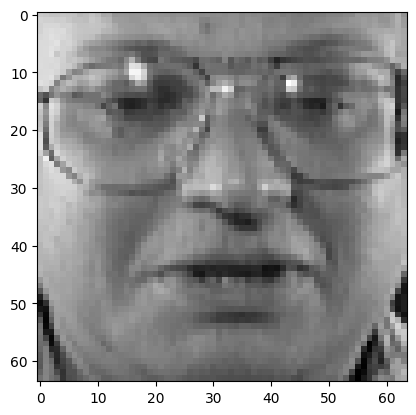

In [6]:
import matplotlib.pyplot as plt
face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [7]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], shape=(4096,), dtype=float32)

In [8]:
import torch
import torch.nn as nn

In [11]:
images = torch.tensor(olivetti_faces.data, dtype=torch.float32)
targets = torch.tensor(olivetti_faces.target, dtype=torch.int64)

In [12]:
images.shape

torch.Size([400, 4096])

In [13]:
targets.shape

torch.Size([400])

In [14]:
dataset = [(img, lbl) for img, lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [15]:
dataloaders = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [17]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='mps')

In [18]:
# 多层神经网络模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.Linear(8192, 16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.ReLU(),
    nn.Linear(1024, 40)
).to(device)

In [19]:
print(model)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8192, out_features=16384, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=16384, out_features=1024, bias=True)
  (6): ReLU()
  (7): Linear(in_features=1024, out_features=40, bias=True)
)


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [21]:
loss_hist = []
for i in range(10):
    for img, lbl in dataloaders:
        img, lbl = img.to(device), lbl.to(device)
        result = model(img)
        loss = criterion(result, lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist.append(loss.item())
        print(f"epoch {i+1}, loss {loss.item():.2f}")

epoch 1, loss 3.71
epoch 1, loss 49.15
epoch 1, loss 6.79
epoch 1, loss 3.53
epoch 1, loss 4.66
epoch 1, loss 3.82
epoch 1, loss 3.80
epoch 1, loss 3.79
epoch 1, loss 3.88
epoch 1, loss 3.77
epoch 1, loss 3.73
epoch 1, loss 3.72
epoch 1, loss 3.69
epoch 1, loss 3.66
epoch 1, loss 3.75
epoch 1, loss 3.68
epoch 1, loss 3.70
epoch 1, loss 3.79
epoch 1, loss 3.82
epoch 1, loss 3.71
epoch 1, loss 3.73
epoch 1, loss 3.75
epoch 1, loss 3.80
epoch 1, loss 3.70
epoch 1, loss 3.74
epoch 1, loss 3.69
epoch 1, loss 3.77
epoch 1, loss 3.70
epoch 1, loss 3.71
epoch 1, loss 3.71
epoch 1, loss 3.70
epoch 1, loss 3.70
epoch 1, loss 3.73
epoch 1, loss 3.72
epoch 1, loss 3.71
epoch 1, loss 3.69
epoch 1, loss 3.65
epoch 1, loss 4.13
epoch 1, loss 3.76
epoch 1, loss 3.71
epoch 2, loss 3.69
epoch 2, loss 3.69
epoch 2, loss 3.68
epoch 2, loss 3.71
epoch 2, loss 3.70
epoch 2, loss 3.70
epoch 2, loss 3.71
epoch 2, loss 3.71
epoch 2, loss 3.71
epoch 2, loss 3.68
epoch 2, loss 3.67
epoch 2, loss 3.72
epoch 2, lo

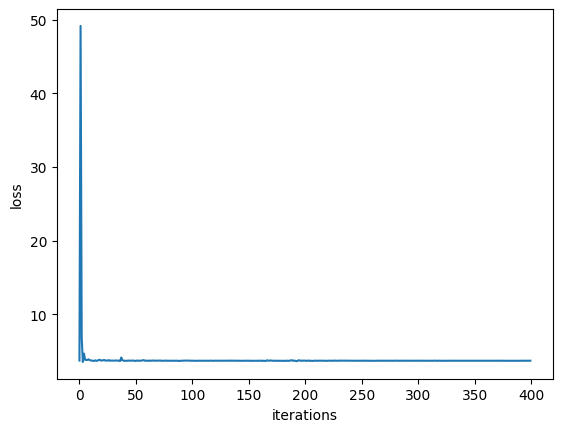

In [22]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()